Resolviendo Sudoku con Algoritmo Voraz...


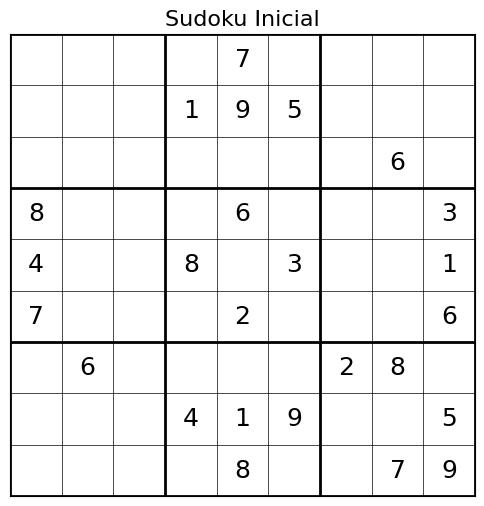

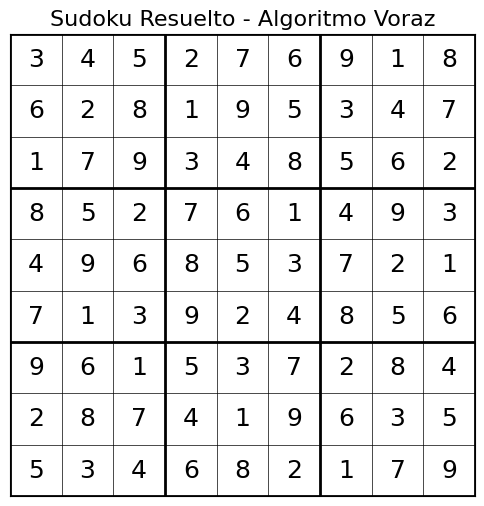

Tiempo de ejecución: 235.8390 segundos
Memoria usada: 2918.52 KB


In [ ]:
import time # Para medir el tiempo de ejecución
import tracemalloc # Para rastrear el uso de memoria
import matplotlib.pyplot as plt  # Para graficar el tablero de Sudoku
import numpy as np # Para trabajar con arreglos numéricos, como el tablero de Sudoku

# Visualizador gráfico del tablero
def imprimir_tablero_grafico(tablero, titulo="Sudoku"):
    """
    Imprime el tablero de Sudoku de manera gráfica usando matplotlib.

    Parámetros:
    tablero (numpy.array): Matriz 9x9 que representa el tablero de Sudoku.
    titulo (str): Título para la visualización del tablero.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(titulo, fontsize=16)

    # Dibuja la cuadrícula del tablero
    for i in range(10):
        # Líneas gruesas para los bordes de las subcuadrículas de 3x3
        lw = 2 if i % 3 == 0 else 0.5
        ax.plot([i, i], [0, 9], color='black', lw=lw)  # Líneas verticales
        ax.plot([0, 9], [i, i], color='black', lw=lw)  # Líneas horizontales

    # Coloca los números dentro del tablero
    for i in range(9):
        for j in range(9):
            num = tablero[i, j]
            if num != 0:  # Verifica que la celda no esté vacía
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center', fontsize=18, color='black')

    # Configuración visual del tablero
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)
    ax.set_xticks([])
    ax.set_yticks([])

    # Muestra la visualización del tablero
    plt.show()

# Método de Backtracking para resolver el Sudoku
def solve_sudoku_voraz(board):
    """
    Resuelve un Sudoku utilizando el algoritmo de Backtracking.

    Parámetros:
    board (numpy.array): Matriz 9x9 que representa el tablero de Sudoku.

    Retorna:
    numpy.array: El tablero resuelto o el mismo tablero si no tiene solución.
    """
    def is_valid(num, row, col):
        """
        Verifica si un número puede colocarse en una posición específica.

        Parámetros:
        num (int): Número a colocar.
        row (int): Fila del tablero.
        col (int): Columna del tablero.

        Retorna:
        bool: True si es válido, False de lo contrario.
        """
        # Verifica la fila y la columna
        for i in range(9):
            if board[row][i] == num or board[i][col] == num:
                return False
        # Verifica la subcuadrícula de 3x3
        box_row, box_col = row // 3 * 3, col // 3 * 3
        for i in range(box_row, box_row + 3):
            for j in range(box_col, box_col + 3):
                if board[i][j] == num:
                    return False
        return True

    def backtrack():
        """
        Implementa el algoritmo de Backtracking para resolver el tablero.

        Retorna:
        bool: True si el tablero se resuelve correctamente, False si no tiene solución.
        """
        for row in range(9):
            for col in range(9):
                if board[row][col] == 0:  # Encuentra una celda vacía
                    for num in range(1, 10):  # Intenta con números del 1 al 9
                        if is_valid(num, row, col):
                            board[row][col] = num  # Coloca el número tentativamente
                            if backtrack():  # Llama recursivamente al algoritmo
                                return True
                            board[row][col] = 0  # Retrocede si no es válido
                    return False  # No hay solución para esta configuración
        return True  # Todas las celdas están llenas correctamente

    # Inicia el proceso de resolución
    if not backtrack():
        print("El Sudoku no tiene solución.")
    return board

# Función para medir el tiempo y memoria de ejecución
def measure_execution(func, board):
    """
    Mide el tiempo y memoria usados por una función que resuelve el Sudoku.

    Parámetros:
    func (function): Función que resuelve el Sudoku.
    board (numpy.array): Tablero de Sudoku a resolver.

    Retorna:
    tuple: Tablero resuelto, tiempo de ejecución (segundos) y memoria máxima usada (KB).
    """
    tracemalloc.start()  # Inicia el seguimiento del uso de memoria
    start_time = time.time()  # Registra el tiempo inicial
    result = func(board)  # Ejecuta la función de resolución
    end_time = time.time()  # Registra el tiempo final
    current, peak = tracemalloc.get_traced_memory()  # Obtiene el uso de memoria
    tracemalloc.stop()  # Detiene el seguimiento de memoria

    execution_time = end_time - start_time  # Calcula el tiempo de ejecución
    memory_used = peak / 1024  # Convierte la memoria usada de bytes a KB

    return result, execution_time, memory_used

# Ejemplo de uso
sudoku_board = np.array([
    [0, 0, 0, 0, 7, 0, 0, 0, 0],
    [0, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9],
])

# Muestra el Sudoku inicial
print("Resolviendo Sudoku con Algoritmo Voraz...")
imprimir_tablero_grafico(sudoku_board, "Sudoku Inicial")

# Resuelve el Sudoku y mide desempeño
solved_board, exec_time, mem_used = measure_execution(solve_sudoku_voraz, sudoku_board)

# Muestra el Sudoku resuelto
imprimir_tablero_grafico(solved_board, "Sudoku Resuelto - Algoritmo Voraz")

# Imprime métricas de ejecución
print(f"Tiempo de ejecución: {exec_time:.4f} segundos")
print(f"Memoria usada: {mem_used:.2f} KB")
